In [1]:
import sys
sys.path.insert(0, '../..')

In [2]:
from coltra.envs import HarvestEnv
from coltra.agents import RandomDAgent
from coltra.buffers import Action
from coltra.trainers import PPOCrowdTrainer
from coltra.models.mlp_models import FancyMLPModel

In [3]:
import yaml

In [4]:
import matplotlib.pyplot as plt

In [5]:
# env = HarvestEnv({}, num_agents=9, size=(20, 40), num_crosses=30)

venv = HarvestEnv.get_venv(workers=8, config={}, num_agents=9, size=(20,40), num_crosses=30)

In [6]:
obs = venv.reset()

In [7]:
for i in range(1000):
    _, _, done, _ = venv.step({})
    if any(done.values()):
        print(i)

999


In [30]:
model = FancyMLPModel()

In [11]:
config = yaml.load('../../configs/cpr_config.yaml')

<ipython-input-11-db26f8e56e55>:1: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load('../../configs/cpr_config.yaml')


In [31]:
obs = env.reset()

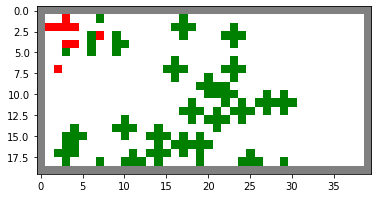

In [46]:
obs_packed, agents = env.pack(obs)

action, _, _ = agent.act(obs_packed)

action = env.unpack(action, agents)

obs, _, _ ,_ = env.step(action)
env.render()

In [10]:
env.game.board

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [311]:
from scipy.ndimage import convolve
import numpy as np
from numba import vectorize

Board = np.ndarray

In [312]:
NEIGHBOR_KERNEL = np.array(
    [
        [0, 0, 1, 0, 0],
        [0, 1, 1, 1, 0],
        [1, 1, 0, 1, 1],
        [0, 1, 1, 1, 0],
        [0, 0, 1, 0, 0],
    ]
)

In [313]:
@vectorize
def regrow_prob(n: int) -> float:
    if n == 0:
        return 0.0
    elif n == 1 or n == 2:
        return 0.01
    elif n == 3 or n == 4:
        return 0.05
    else:
        return 0.1


In [314]:
def regenerate_apples(board: Board, walls: Board) -> Board:
    kernel = NEIGHBOR_KERNEL
    neighbor_map: np.ndarray = convolve(board, kernel, mode="constant")
    # The types here are fine, but numba.vectorize preserves the signature
    # noinspection PyTypeChecker
    prob_map = regrow_prob(neighbor_map)

    rand = np.random.rand(*neighbor_map.shape)
    regen_map = rand < prob_map
    # updated_board = np.clip(board + regen_map, 0, 1).astype(int)
    updated_board = (board + regen_map > 0).astype(int)

    updated_board = updated_board * (1-walls)
    return updated_board

In [318]:
board = env.game.board

In [319]:
kernel = NEIGHBOR_KERNEL

n_board = convolve(board, kernel, mode="constant")

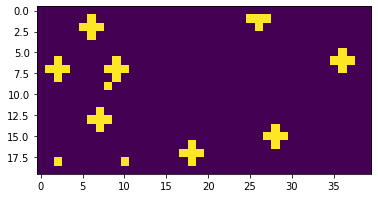

In [322]:
plt.imshow(board)

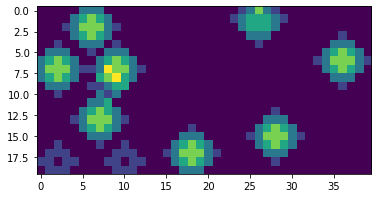

In [321]:
plt.imshow(n_board)

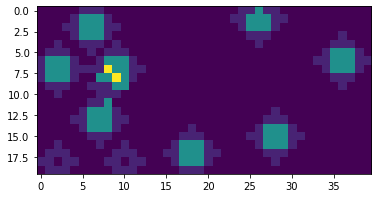

In [326]:
prob_board = regrow_prob(n_board)
plt.imshow(prob_board)

In [350]:
rand = np.random.rand(*n_board.shape)
regen_map = rand < prob_board

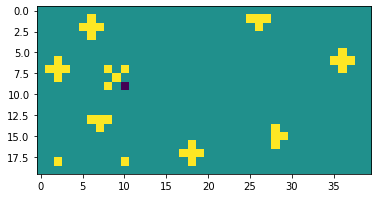

In [347]:
plt.imshow(board + regen_map)

In [348]:
regenerate_apples(env.game.board, env.game.walls)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   

In [60]:
action["Agent0"].discrete

False

In [67]:
obs['Agent0'].vector.shape

(1260,)